## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [25]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [13]:
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEAR_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])/365
app_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,YEAR_BIRTH,YEAR_EMPLOYED
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,1,0,1,0,False,25.920548,1.745205
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,1,0,False,45.931507,3.254795
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,False,52.180822,0.616438
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,False,52.068493,8.326027
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,False,54.608219,8.323288


In [14]:
app_train['YEAR_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEAR_EMPLOYED, dtype: float64

In [15]:
app_train['EMPLOTED_BIN']= pd.cut(app_train['YEAR_EMPLOYED'],np.linspace(0,50,11))

In [17]:
app_train['EMPLOTED_BIN'].unique()

[(0.0, 5.0], (5.0, 10.0], NaN, (20.0, 25.0], (10.0, 15.0], ..., (15.0, 20.0], (30.0, 35.0], (40.0, 45.0], (35.0, 40.0], (45.0, 50.0]]
Length: 11
Categories (10, interval[float64]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (30.0, 35.0] < (35.0, 40.0] < (40.0, 45.0] < (45.0, 50.0]]

In [20]:
app_train['EMPLOTED_BIN'].value_counts()

(0.0, 5.0]      136309
(5.0, 10.0]      64872
(10.0, 15.0]     27549
(15.0, 20.0]     10849
(20.0, 25.0]      6243
(25.0, 30.0]      3308
(30.0, 35.0]      1939
(35.0, 40.0]       832
(40.0, 45.0]       210
(45.0, 50.0]        24
Name: EMPLOTED_BIN, dtype: int64

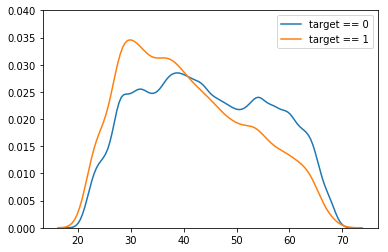

In [32]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'YEAR_BIRTH'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'YEAR_BIRTH'], label = 'target == 1')
plt.ylim(0,0.04)
plt.show()

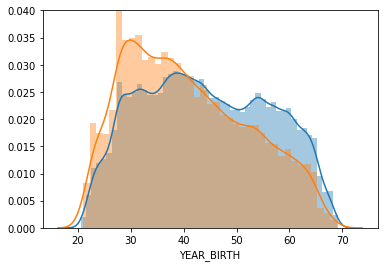

In [39]:
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'YEAR_BIRTH'], label = 'target == 0')
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'YEAR_BIRTH'], label = 'target == 1')
plt.ylim(0,0.04)
plt.show()

/Users/gcptien/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/gcptien/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


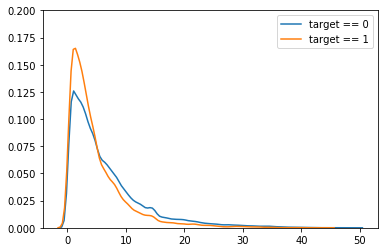

In [35]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'YEAR_EMPLOYED'], label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'YEAR_EMPLOYED'], label = 'target == 1')
plt.ylim(0,0.2)
plt.show()

In [51]:
df = app_train.copy()
df['YEAR_EMPLOYED'].dropna(axis=0,inplace=True)
df['YEAR_EMPLOYED'].value_counts()


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
9         False
10        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
          ...  
307477    False
307478    False
307479    False
307480    False
307481    False
307482    False
307484    False
307485    False
307486    False
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307506    False
307508    False
307509    False
307510    False
Name: YEAR_EMPLOYED, Len

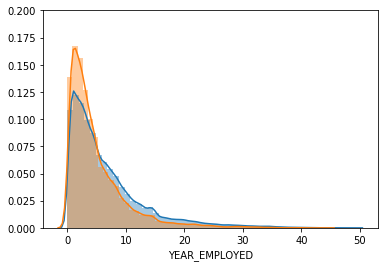

In [52]:

sns.distplot(df.loc[df['TARGET'] == 0, 'YEAR_EMPLOYED'], label = 'target == 0')
sns.distplot(df.loc[df['TARGET'] == 1, 'YEAR_EMPLOYED'], label = 'target == 1')
plt.ylim(0,0.2)
plt.show()

TypeError: len() of unsized object

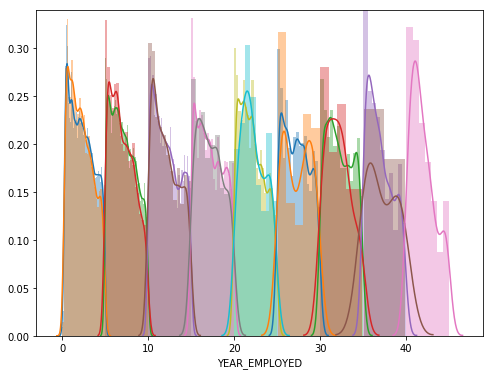

In [57]:
year_group_sorted = df['EMPLOTED_BIN'].unique().sort_values()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(df.loc[(df['EMPLOTED_BIN'] == year_group_sorted[i]) & \
                              (df['TARGET'] == 0), 'YEAR_EMPLOYED'], label = str(year_group_sorted[i]))
    
    sns.distplot(df.loc[(df['EMPLOTED_BIN'] == year_group_sorted[i]) & \
                              (df['TARGET'] == 1), 'YEAR_EMPLOYED'], label = str(year_group_sorted[i]))
plt.title('KDE with YEAR groups')
plt.show()

In [63]:
len(age_groups.index)
len(df['TARGET'
])

307511

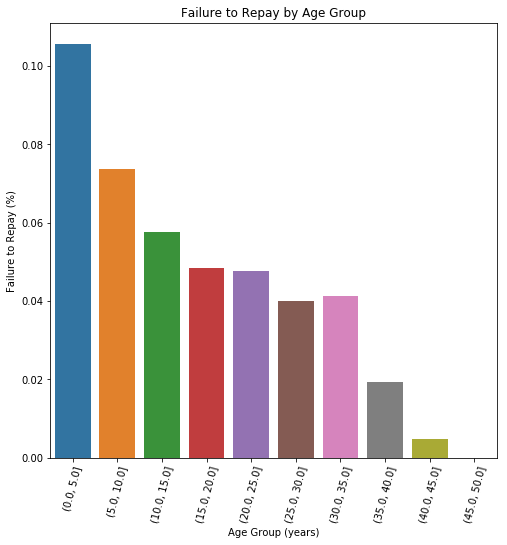

In [64]:
plt.figure(figsize = (8, 8))
age_groups  = df.groupby('EMPLOTED_BIN').mean()

# 以年齡區間為 x, target 為 y 繪製 barplot

px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');